# Visualizing Exchange Rates
For this project, we'll be presenting different ways to visualize data.  We'll be focusing on data exchange rates for the Euro and American Dollar between 1999 and 2021.

We'll begin by reading in the data, inspecting a sample of the dataset, and learning some basic facts about the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.sample(10)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5618,1999-04-26,1.6349,NaN,NaN,1.5692,1.6027,NaN,0.57870,37.710,7.4335,...,1.5703,26.0381,8.8945,1.8046,192.9845,44.799,40.0069,0.4122,1.0614,6.4480
4330,2004-04-01,1.6125,1.9466,3.5401,1.6150,1.5595,10.1973,0.58617,32.885,7.4458,...,4.1125,35.1154,9.2340,2.0600,238.4300,40.085,48.2172,1.6146,1.2320,7.8278
3672,2006-10-10,1.6853,1.9558,2.7134,1.4154,1.5909,9.9191,0.57670,28.195,7.4556,...,3.5072,33.7930,9.2740,1.9944,239.6000,37.023,47.0490,1.8800,1.2538,9.7824
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
702,2018-04-11,1.5980,1.9558,4.2333,1.5625,1.1855,7.7815,NaN,25.323,7.4449,...,4.6627,80.0075,10.2863,1.6204,NaN,NaN,38.6010,5.1832,1.2384,14.9678
4128,2005-01-10,1.7256,1.9559,3.5383,1.6041,1.5469,10.8454,0.58090,30.245,7.4403,...,3.8671,36.3559,9.0430,2.1573,239.7800,38.528,51.2530,1.8155,1.3103,7.8438
3250,2008-05-22,1.6400,1.9558,2.6111,1.5494,1.6194,10.9387,NaN,25.147,7.4599,...,3.6846,37.1575,9.3045,2.1391,NaN,31.147,50.2940,1.9705,1.5755,12.1458
2595,2010-11-25,1.3595,1.9558,2.2902,1.3454,1.3326,8.8595,NaN,24.720,7.4558,...,4.2995,41.6510,9.2705,1.7428,NaN,NaN,40.0360,1.9660,1.3321,9.3897
573,2018-10-10,1.6206,1.9558,4.2893,1.4907,1.1412,7.9621,NaN,25.807,7.4601,...,4.6640,76.1830,10.4800,1.5904,NaN,NaN,37.8640,6.9886,1.1500,16.8243
687,2018-05-03,1.5926,1.9558,4.2367,1.5404,1.1958,7.6135,NaN,25.585,7.4497,...,4.6658,76.0875,10.6045,1.5962,NaN,NaN,37.9310,5.0360,1.1992,15.1399


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Quickly looking at the dataset info, we can see that there are 40 different currencies.  However, we can see that some of the columns have null values and most are objects.  We'll need to do some cleaning to convert these to numbers and the period to a datetime data type.  It will be helpful to rename the column names for ease of typing.

Since we'll be focusing only on the the exchange rate between the Euro and the American Dollar.  We only need to focus on these columns.

## Data Cleaning

In [4]:
exchange_rates.rename(columns= {'[US dollar ]':'US_dollar',
                                'Period\\Unit:':'Time'},
                      inplace = True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace = True)
exchange_rates.reset_index(drop=True,inplace= True)

Now that we did some basic data cleaning, let's separate out the US Dollar and time and create a new dataset with just that.

In [5]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0888     6
          ..
1.2437     1
0.9800     1
1.2130     1
1.2978     1
1.0541     1
Name: US_dollar, Length: 3528, dtype: int64

It looks like there are a lot of rows that have '-'.  We'll need to drop those for our visualization to work effectively.

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [7]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


Looks like our data is cleaned and good to go.  Let's begin visualizing it with a simple line plot for exploratory purposes.

## Exploratory Graph

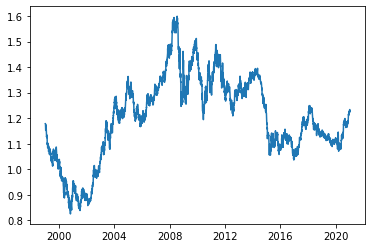

In [8]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])

This quick graph is a bit messy due to the daily variations in value.  We can instead take the rolling mean of the data to smooth out the lines while still conveying the same trends.  We can have the rolling window be 30 days to signify months.

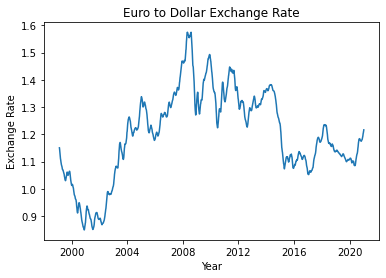

In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean'])
plt.title('Euro to Dollar Exchange Rate')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.show()

Taking a brief look at the graph, the exchange rate peaked in 2008 and then dropped pretty dramatically.  One explanation for this would be the 2007-2008 financial crisis.  This would be an interesting angle to explore further and provide a more explanatory graph.

## Storytelling Data Visualization
### 2007-2008's Financial Crisis
The financial crisis of 2007–2008 was a worldwide economic crisis. Prior to 2020's COVID-19 crisis, the financial crisis of 2007-2008 was considered one of the worst economic catastrophe since the Great Depression.  

We can zoom in the years surrounding this event to help an audience easily visualize the impact.

We'll begin by separating the data into two datasets.  One with the years 2006-2009 and one with just 2007 and 2008.

In [10]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_07_08 = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2007
                   ) & (euro_to_dollar['Time'].dt.year <= 2008)]

Now that we have the two datasets, we can create our visualzation.

In [11]:
import matplotlib.style as style
from matplotlib.dates import date2num
style.use('fivethirtyeight')

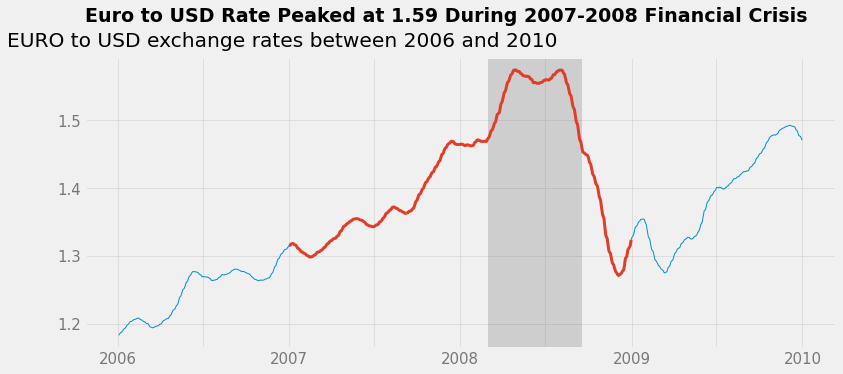

In [12]:
#Creating the plot and adding the 2006-2009 line
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(financial_crisis['Time'],financial_crisis['rolling_mean'],
       linewidth = 1)

#adding the 2007-2008 line and making it thicker and red
ax.plot(financial_crisis_07_08['Time'], financial_crisis_07_08['rolling_mean'],
       linewidth = 3, color = '#e23d28')

#highlighting the area of the crisis
ax.axvspan(date2num(dt.datetime(2008,3,1)),date2num(dt.datetime(2008,9,15)),
           alpha=0.3, color='grey')

### Creating new tick labels
ax.set_yticks([[1.2],[1.3],[1.4],[1.5]])
ax.set_yticklabels([1.2,1.3,1.4,1.5],alpha = 0.5, fontsize = 15)
ax.set_xticklabels([2006,'',2007,'',2008,'',2009,'',2010], alpha = 0.5, fontsize = 15)

#adding some transparency to grid
ax.grid(alpha = 0.5)

plt.title('Euro to USD Rate Peaked at 1.59 During 2007-2008 Financial Crisis', 
          weight = 'bold',
         fontsize = 19, loc = 'left', pad = 35)
plt.suptitle('EURO to USD exchange rates between 2006 and 2010',x =  .3091, y = .95, fontsize = 'x-large')

plt.show()

# Conclusion
With utilizing some exploratory graphs, we were able to choose a direction to analyze and help the audience visualize our findings.  Using explanatory graphs and the <code>'fivethirtyeight'</code> style we were able to display a user friendly graph.
